f:\ML\python\Deep learning\Customer Churn ANN\myenv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)


🔄 Training ANN model...
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7205 - loss: 0.5915 - val_accuracy: 0.8420 - val_loss: 0.4733
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8750 - loss: 0.3713 - val_accuracy: 0.8940 - val_loss: 0.2802
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9075 - loss: 0.2419 - val_accuracy: 0.9250 - val_loss: 0.2044
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9342 - loss: 0.1803 - val_accuracy: 0.9460 - val_loss: 0.1510
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9495 - loss: 0.1420 - val_accuracy: 0.9600 - val_loss: 0.1233
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9622 - loss: 0.1167 - val_accuracy: 0.9660 - val_loss: 0.1047
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9725 - loss: 0.0998 - val_accuracy: 0.9740 - val_loss: 0.0913
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9753 - loss: 0.0898 - val_acc

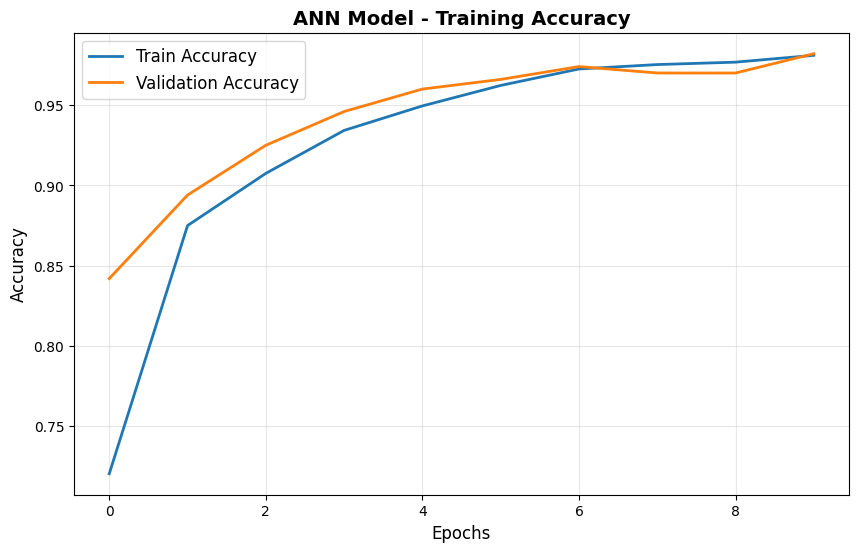


🧠 Model Type: ANN
📊 Dataset Shape: (4000, 10)
🔹 Generating LIME Explanation for ANN...


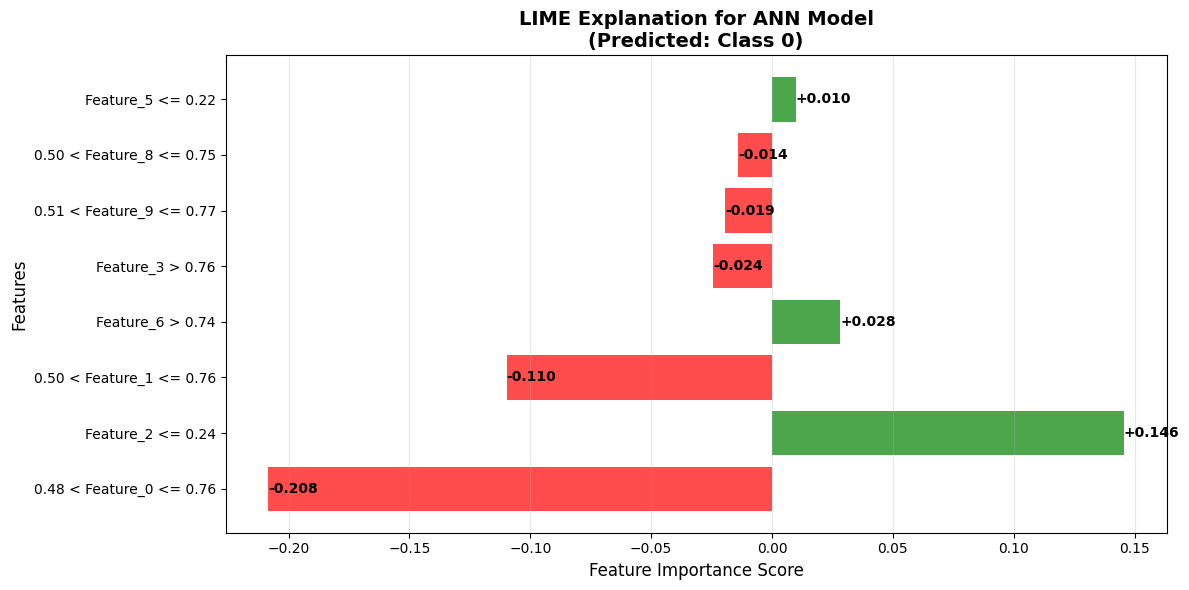


📊 LIME Explanation Summary for ANN:
Predicted class: 0
Prediction probability: 0.291
Top feature contributions:
  0.48 < Feature_0 <= 0.76: -0.208
  Feature_2 <= 0.24: +0.146
  0.50 < Feature_1 <= 0.76: -0.110
  Feature_6 > 0.74: +0.028
  Feature_3 > 0.76: -0.024
  0.51 < Feature_9 <= 0.77: -0.019
  0.50 < Feature_8 <= 0.75: -0.014
  Feature_5 <= 0.22: +0.010

🎉 LIME explanation completed for ANN model!

📈 MODEL SUMMARY: ANN
✅ Final Test Accuracy: 98.20%
📦 Training Samples: 4000
🧪 Test Samples: 1000
🔢 Input Shape: (10,)


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, GRU, SimpleRNN
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from lime import lime_image, lime_tabular
from skimage.color import gray2rgb
from skimage.segmentation import mark_boundaries

model_type = 'ANN'


if model_type in ['ANN', 'RNN', 'LSTM', 'GRU']:

    X = np.random.rand(5000, 10)
    y = (X[:, 0] + X[:, 1] * 0.5 + X[:, 2] * 0.3 > 1.0).astype(int)

    # Reshape for sequence models
    if model_type in ['RNN', 'LSTM', 'GRU']:
        X = X.reshape(-1, 10, 1)  # (samples, timesteps, features)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

elif model_type == 'CNN':
    from tensorflow.keras.datasets import mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    X_train = X_train[:5000].reshape(-1, 28, 28, 1) / 255.0
    X_test = X_test[:1000].reshape(-1, 28, 28, 1) / 255.0
    y_train = to_categorical(y_train[:5000])
    y_test = to_categorical(y_test[:1000])


model = Sequential()

if model_type == 'ANN':
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

elif model_type == 'CNN':
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

elif model_type == 'RNN':
    model.add(SimpleRNN(64, activation='tanh', input_shape=(10, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

elif model_type == 'LSTM':
    model.add(LSTM(64, activation='tanh', input_shape=(10,1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

elif model_type == 'GRU':
    model.add(GRU(64, activation='tanh', input_shape=(10,1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

print(f"\n Training {model_type} model...")

if model_type == 'CNN':
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test, y_test),
        verbose=1
    )
else:
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test, y_test),
        verbose=1
    )

if model_type == 'CNN':
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
else:
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
print(f'\n {model_type} Test Accuracy: {acc*100:.2f}%')

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title(f'{model_type} Model - Training Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


def explain_cnn(model, X_test, sample_idx=0):
    """LIME explanation for CNN (Image data)"""
    print("🔹 Generating LIME Explanation for CNN...")
    
    image_rgb = gray2rgb((X_test[sample_idx] * 255).reshape(28, 28).astype(np.uint8))

    explainer = lime_image.LimeImageExplainer()

    def predict_fn(images):
        gray_images = np.dot(images[..., :3], [0.2989, 0.5870, 0.1140])
        gray_images = gray_images.reshape(-1, 28, 28, 1) / 255.0
        return model.predict(gray_images, verbose=0)

    explanation = explainer.explain_instance(
        image_rgb,
        classifier_fn=predict_fn,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )

    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=10,
        hide_rest=False
    )

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(X_test[sample_idx].reshape(28, 28), cmap='gray')
    plt.title("Original Image", fontweight='bold')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(temp / 255.0, mask))
    plt.title("LIME Explanation - Important Regions", fontweight='bold')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def explain_tabular(model, X_test, model_type, sample_idx=0):
    """LIME explanation for ANN, RNN, LSTM, GRU (Tabular/Sequence data)"""
    print(f"🔹 Generating LIME Explanation for {model_type}...")
    

    if model_type == 'ANN':
        num_features = X_test.shape[1]
        feature_names = [f'Feature_{i}' for i in range(num_features)]
        X_test_flat = X_test
    else:  # RNN, LSTM, GRU
        num_features = X_test.shape[1]  # timesteps
        feature_names = [f'TimeStep_{i}' for i in range(num_features)]
        X_test_flat = X_test.reshape(X_test.shape[0], -1)
    
    # Create LIME explainer
    explainer = lime_tabular.LimeTabularExplainer(
        training_data=X_test_flat,
        feature_names=feature_names,
        mode='classification',
        class_names=['Class 0', 'Class 1'],
        random_state=42
    )
    
    def predict_proba(x):
        """Convert model output to probability format expected by LIME"""
        if model_type in ['RNN', 'LSTM', 'GRU']:
            # Reshape for sequence models: (samples, timesteps, features)
            x_reshaped = x.reshape(-1, X_test.shape[1], 1)
            predictions = model.predict(x_reshaped, verbose=0)
        else:
            predictions = model.predict(x, verbose=0)
        
        # Convert to probability format: [prob_class0, prob_class1]
        if predictions.shape[1] == 1:  # Binary classification with single output
            prob_class0 = 1 - predictions.flatten()
            prob_class1 = predictions.flatten()
            return np.vstack([prob_class0, prob_class1]).T
        else:  # Multi-class classification
            return predictions
    
    # Select sample to explain
    if model_type in ['RNN', 'LSTM', 'GRU']:
        sample = X_test_flat[sample_idx]
    else:
        sample = X_test[sample_idx]
    
    # Generate explanation
    explanation = explainer.explain_instance(
        sample,
        predict_proba,
        num_features=min(8, len(feature_names)),
        top_labels=1
    )
    
    # Plot explanation
    plt.figure(figsize=(12, 6))
    
    # Get the label with highest probability
    label = explanation.top_labels[0]
    
    # Show explanation for the predicted class
    exp_list = explanation.as_list(label=label)
    
    # Create horizontal bar plot
    features, scores = zip(*exp_list)
    colors = ['green' if score > 0 else 'red' for score in scores]
    
    y_pos = np.arange(len(features))
    plt.barh(y_pos, scores, color=colors, alpha=0.7)
    plt.yticks(y_pos, features)
    plt.xlabel('Feature Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'LIME Explanation for {model_type} Model\n(Predicted: Class {label})', 
              fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(scores):
        plt.text(v, i, f'{v:+.3f}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print explanation in console
    print(f"\n📊 LIME Explanation Summary for {model_type}:")
    print(f"Predicted class: {label}")
    actual_pred = model.predict(X_test[sample_idx:sample_idx+1], verbose=0)[0][0]
    print(f"Prediction probability: {actual_pred:.3f}")
    print("Top feature contributions:")
    for feature, score in exp_list:
        print(f"  {feature}: {score:+.3f}")

# ----------------------------------------------------------
# Generate LIME Explanations based on Model Type
# ----------------------------------------------------------
sample_idx = 0  # Explain the first test sample

print(f"\n🧠 Model Type: {model_type}")
print(f"📊 Dataset Shape: {X_train.shape}")

if model_type == 'CNN':
    explain_cnn(model, X_test, sample_idx)
else:
    explain_tabular(model, X_test, model_type, sample_idx)

print(f"\n🎉 LIME explanation completed for {model_type} model!")

# ----------------------------------------------------------
# Model Comparison Summary (Optional)
# ----------------------------------------------------------
print(f"\n{'='*50}")
print(f"📈 MODEL SUMMARY: {model_type}")
print(f"{'='*50}")
print(f"✅ Final Test Accuracy: {acc*100:.2f}%")
print(f"📦 Training Samples: {X_train.shape[0]}")
print(f"🧪 Test Samples: {X_test.shape[0]}")
print(f"🔢 Input Shape: {X_train.shape[1:]}")
print(f"{'='*50}")